# Equalização

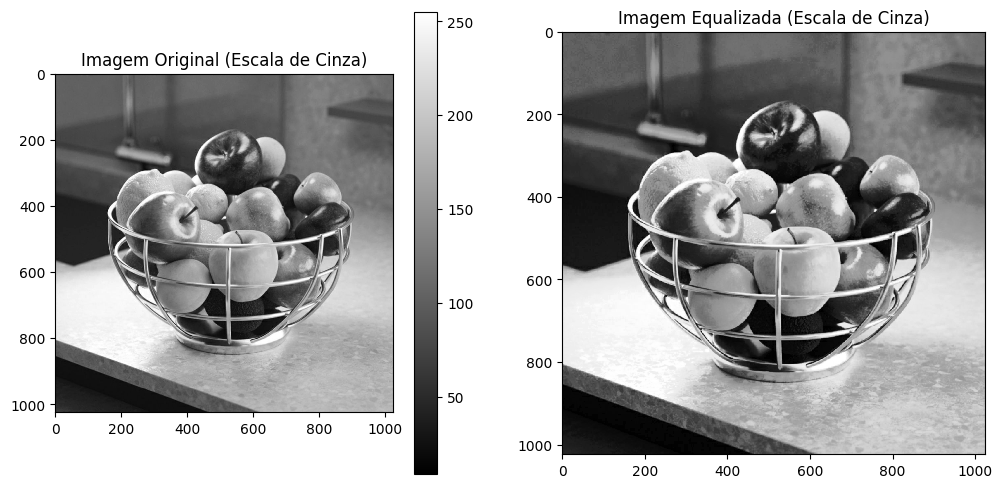

Matriz de Pixels da Imagem Original (Escala de Cinza):
Linhas: 1024, Colunas: 1024, Total de Elementos: 1048576
[[103 103 102 ... 108 105 102]
 [103 103 102 ... 108 105 102]
 [103 103 102 ... 107 104 102]
 ...
 [ 66  65  64 ... 180 179 178]
 [ 65  65  65 ... 179 178 178]
 [ 64  65  65 ... 179 178 177]]

Matriz de Pixels da Imagem Equalizada (Escala de Cinza):
Linhas: 1024, Colunas: 1024, Total de Elementos: 1048576
[[ 97  97  93 ... 106 101  93]
 [ 97  97  93 ... 106 101  93]
 [ 97  97  93 ... 105  99  93]
 ...
 [ 39  38  38 ... 189 187 185]
 [ 38  38  38 ... 187 185 185]
 [ 38  38  38 ... 187 185 183]]


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def equalizar_histograma(imagem):
    # inicializar variaveis
    L = 256  # níveis de cinza (0 a 255)
    altura, largura = imagem.shape
    num_pixels = altura * largura

    # Calcular o histograma (nk)
    histograma = [0] * L
    for linha in imagem:
        for pixel in linha:
            histograma[pixel] += 1

    # calcular Pr(rk)
    Pr = [0] * L
    for k in range(L):
        Pr[k] = histograma[k] / num_pixels

    # calcular a equalização (Eq)
    eq = [0] * L
    freq = 0
    for k in range(L):
        #Calcular a Freq      
        freq += Pr[k]  # somatorio: 0,062
        eq[k] = round((L - 1) * freq)

    # aplicar a equalização à imagem
    imagem_equalizada = np.zeros_like(imagem)
    for i in range(altura):
        for j in range(largura):
            imagem_equalizada[i, j] = eq[imagem[i, j]]

    return imagem_equalizada

# carregar imagem tons de cinza
imagem = cv2.imread('img/frutas.jpg', cv2.IMREAD_GRAYSCALE)

# aplicar equalização
imagem_equalizada = equalizar_histograma(imagem)

# printar imagens
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Imagem Original (Escala de Cinza)")
plt.imshow(imagem, cmap='gray', interpolation='nearest')

plt.subplot(1, 2, 2)
plt.title("Imagem Equalizada (Escala de Cinza)")
plt.imshow(imagem_equalizada, cmap='gray', interpolation='nearest')

plt.show()

# salvar imagem equalizada
cv2.imwrite('img/imagem_equalizada.jpg', imagem_equalizada)

# printar informações das imagens
n_linhas_original, n_colunas_original = imagem.shape[:2]
n_elementos_original = imagem.size

n_linhas_equalizada, n_colunas_equalizada = imagem_equalizada.shape[:2]
n_elementos_equalizada = imagem_equalizada.size

print(f"Matriz de Pixels da Imagem Original (Escala de Cinza):")
print(f"Linhas: {n_linhas_original}, Colunas: {n_colunas_original}, Total de Elementos: {n_elementos_original}")
print(imagem)

print(f"\nMatriz de Pixels da Imagem Equalizada (Escala de Cinza):")
print(f"Linhas: {n_linhas_equalizada}, Colunas: {n_colunas_equalizada}, Total de Elementos: {n_elementos_equalizada}")
print(imagem_equalizada)
